In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import colors, ticker, cm
from scipy.optimize import curve_fit
import utils as u

In [4]:
def power_law_fit_model(x,a,c):
    return c*x**(-a)


# One-dimensional

In [4]:
def f(x):
    return np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

In [5]:
def f(x):
    return (x**0.7)*np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

In [6]:
f(0.12)

-0.10464251439461536

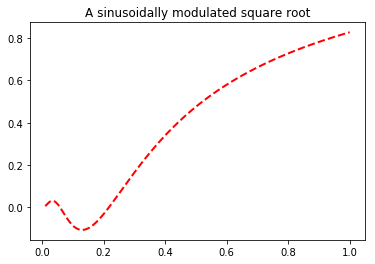

In [7]:
x = np.linspace(0.01,1,10000); y = f(x);
plt.plot(x, y, color="red", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
plt.show()

## Quadrature

In [11]:
def quadIntegral(nP):
    _values=np.linspace(0.01,1,nP); 
    _sampled_values=[ f(num) for num in _values];
    return np.sum(_sampled_values)/np.size(_sampled_values)

In [8]:
def quadIntegralFast(nP):
    _values=np.linspace(0.01,1,nP); 
    _sampled_values=f(_values);
    return np.sum(_sampled_values)/np.size(_sampled_values)

In [12]:
quadIntegral(100000)

0.40849889687330521

In [10]:
quadIntegralFast(100000)

0.40849889687330521

In [193]:
_x=[ 1000, 3000, 10000, 30000, 100000, 300000, 1000000 ]
quadIntegrals = np.array([ quadIntegralFast(k) for k in _x ])

In [194]:
_y = np.abs(quadIntegrals - quadIntegrals[-1])
_dy = 40/np.power(_x,2)

In [195]:
_y

array([  4.76340042e-05,   1.53860969e-05,   4.53549587e-06,
         1.47681919e-06,   4.10637875e-07,   1.06429412e-07,
         0.00000000e+00])

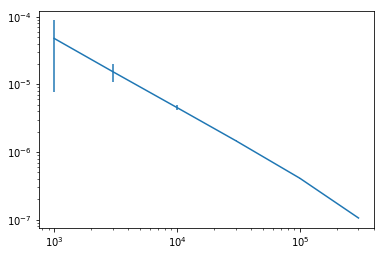

In [196]:
fig, ax = plt.subplots()
last=-1
ax.errorbar(_x[0:last], _y[0:last], yerr=_dy[0:last])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [200]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [201]:
popt, pcov

(array([ 1.19096386,  0.35544782]), array([[ 0.00058831,  0.00262025],
        [ 0.00262025,  0.01167829]]))

In [202]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

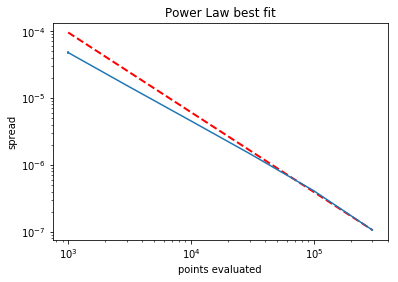

In [203]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('points evaluated')
#plt.ylabel('some numbers')
plt.show()

## MC prototype

In [13]:
def mcIntegral(nP):
    _values=np.random.rand(nP)
    _sampled_values=[ f(num) for num in _values];
    return np.sum(_sampled_values)/np.size(_sampled_values)

In [14]:
def mcIntegralFast(nP):
    _values=np.random.rand(nP)
    _sampled_values=f(_values) ;
    return np.sum(_sampled_values)/np.size(_sampled_values)

In [15]:
mcIntegral(100000)

0.40534095635080941

In [17]:
mcIntegralFast(100000)

0.40399172728178384

In [85]:
a = np.array([[1, 2, 3, 4]])
print(np.mean(np.power(a-a.mean(),2)))
np.var(a)

1.25


1.25

In [19]:
def averageMCintegral(nP,trials=100):
    _arr=[ mcIntegralFast(nP) for k in range(trials) ]
    return np.sum(_arr )/trials, np.sqrt(np.var(_arr))  #returns the mean and the std-deviation

In [20]:
averageMCintegral(100)

(0.40704313949852222, 0.030765420688291821)

In [21]:
MCintegrals=np.array([ averageMCintegral(k) for k in [10, 100, 1000, 3000, 10000, 30000 ] ])

In [11]:
MCintegrals

array([[ 0.53427056,  0.1379695 ],
       [ 0.52312791,  0.04008927],
       [ 0.52506692,  0.01344772],
       [ 0.52469362,  0.0075922 ],
       [ 0.5251178 ,  0.00410829],
       [ 0.52560361,  0.00261219]])

In [12]:
MCintegrals[:,0]

array([ 0.53427056,  0.52312791,  0.52506692,  0.52469362,  0.5251178 ,
        0.52560361])

In [170]:
_x = [ 1000, 3000, 10000, 30000, 300000 ]
MCintegrals=np.array([ averageMCintegral(k) for k in _x ])

In [166]:
_y = MCintegrals[:,0] -0.53054788312233625
_dy = MCintegrals[:,1]

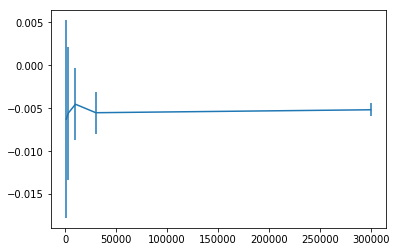

In [167]:
fig, ax = plt.subplots()

ax.errorbar(_x, _y, yerr=_dy)
plt.show()

## MC

In [230]:
_x = np.power(np.array([   30, 50, 75, 100, 150 ]),3)
_x = np.array([ 1000, 10000, 100000, 10**6,5*10**6, 8*10**6 ,10**7 ])

#_x = np.power(np.array([  30, 50, 60, 70, 80, 100 ]),3)
#_x = [10,30,50,100,300,1000]
mcIntegrals=np.array([ averageMCintegral(k,trials=10) for k in _x ])

In [231]:
_y = np.abs(mcIntegrals[:,0] - mcIntegrals[:,0][-1])

_dy = mcIntegrals[:,1]

In [232]:
_y, _y[0:-1]

(array([  4.02366965e-03,   2.65541801e-04,   3.00339132e-04,
          1.69436176e-04,   2.40086768e-05,   1.93957473e-05,
          0.00000000e+00]),
 array([  4.02366965e-03,   2.65541801e-04,   3.00339132e-04,
          1.69436176e-04,   2.40086768e-05,   1.93957473e-05]))

In [233]:
_dy, _dy[0:-1]

(array([  1.39183823e-02,   2.52060533e-03,   8.47479519e-04,
          3.12628523e-04,   9.48480596e-05,   1.06714407e-04,
          8.97682351e-05]),
 array([  1.39183823e-02,   2.52060533e-03,   8.47479519e-04,
          3.12628523e-04,   9.48480596e-05,   1.06714407e-04]))

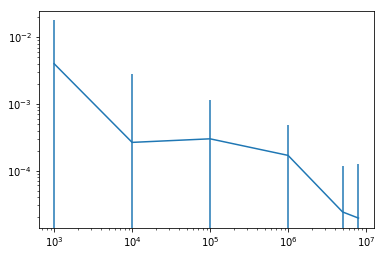

In [234]:
fig, ax = plt.subplots();

ax.set_yscale('log');
ax.set_xscale('log');
ax.errorbar(_x[0:-1], _y[0:-1], yerr=_dy[0:-1])
plt.show()

In [235]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[0.5,1.11],bounds=(0,np.inf))


In [236]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([ 0.42593605,  0.01700979]), array([[ 0.06838992,  0.03531483],
        [ 0.03531483,  0.01824601]]), 0.75239886631142927)

In [237]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

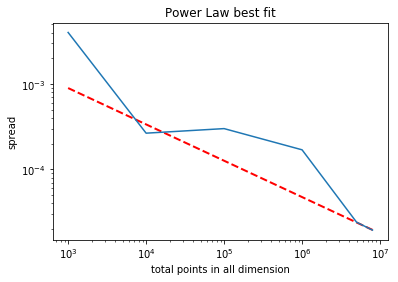

In [238]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

## Halton MC

In [154]:
import ghalton
#The last code will produce a sequence in five dimension. To get the points use


In [259]:
points = sequencer.get(1000000)

In [260]:
list_points=np.array(u.flattenOnce(points))

In [261]:
u.write_lines_to_file_newline(list_points,'numbers.txt')

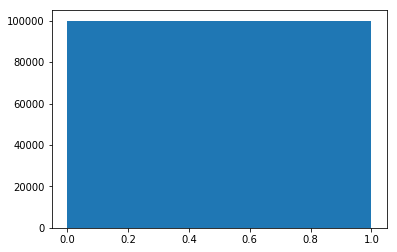

In [158]:
plt.hist(list_points)
plt.show()

In [239]:
def averageHaltonMCintegral(nP,trials=4):
    _arr=[ HaltonMCintegral(int(nP)) for k in range(trials) ]
    return np.sum(_arr )/trials, np.sqrt(np.var(_arr))  #returns the mean and the std-deviation

In [160]:
def HaltonMCintegral(k):
    sequencer = ghalton.Halton(1)
    points = sequencer.get(k)
    list_points=np.array(u.flattenOnce(points))
    _values=list_points
    _sampled_values=f(_values) ;
    return np.sum(_sampled_values)/np.size(_sampled_values)

In [246]:
_x = np.power(np.array([  10, 30, 50, 70, 100 ]),3)
_x = np.array([ 1000, 10000, 100000, 10**6,5*10**6, 8*10**6 ])

#_x = [10,30,50,100,300,1000]
mcIntegrals=np.array([ averageHaltonMCintegral(k,trials=4) for k in _x ])

In [247]:
_y = np.abs(mcIntegrals[:,0] - mcIntegrals[:,0][-1])

_dy = mcIntegrals[:,1]

In [248]:
_y, _y[0:-1]

(array([  1.06741323e-03,   1.39184301e-04,   1.69750823e-05,
          1.52623988e-06,   2.54891837e-07,   0.00000000e+00]),
 array([  1.06741323e-03,   1.39184301e-04,   1.69750823e-05,
          1.52623988e-06,   2.54891837e-07]))

In [249]:
_dy, _dy[0:-1]

(array([ 0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.]))

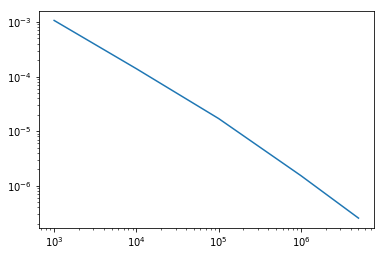

In [250]:
fig, ax = plt.subplots();

ax.set_yscale('log');
ax.set_xscale('log');
ax.errorbar(_x[0:-1], _y[0:-1], yerr=_dy[0:-1])
plt.show()

In [255]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [256]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([ 1.10936111,  6.88595133]), array([[ 0.00601602,  0.06191211],
        [ 0.06191211,  0.6372482 ]]), 1.0352001176054357)

In [257]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

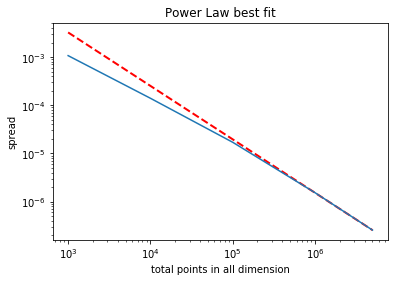

In [258]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

# Two-dimensional

In [262]:
def f2d(x,y):
    return np.sin(y)*np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

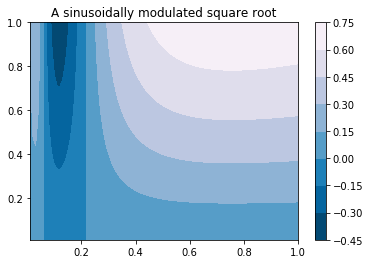

In [263]:
x = np.linspace(0.01,1,100); 
y = np.linspace(0.01,1,100);
X, Y = np.meshgrid(x, y)
z = f2d(X,Y);
fig, ax = plt.subplots()
cs=ax.contourf(X, Y, z,cmap=cm.PuBu_r)#, color="red", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
cbar = fig.colorbar(cs)
plt.show()

In [264]:
np.size(Y)

10000

In [265]:
def quadIntegral2d(nP):
    _Xvalues=np.linspace(0.01,1,nP);
    _Yvalues=np.linspace(0.01,1,nP);
    _X, _Y = np.meshgrid(_Xvalues, _Yvalues)
    _z = f2d(_X,_Y);
    return np.sum(_z)/np.size(_z)
    #_sampled_values=np.array([ [ f2d(numX,numY) for numX in _Xvalues ] for numY in _Yvalues ]); #cycles ---> slow!
    #return np.sum(_sampled_values)/np.size(_sampled_values)


In [266]:
quadIntegral2d(100)

0.24581305129292896

In [267]:
_x = [ 30, 100, 300, 1000, 3000, 10000 ]
QuadIntegrals=np.array([ quadIntegral2d(k) for k in _x ])

10K in each dimension makes already 10^8 points => 3 Gb RAM occupation

<img src="Screenshot 2018-04-03 16.49.30.png">

In [268]:
_y = np.abs(QuadIntegrals - QuadIntegrals[-1])

#_dy = QuadIntegrals[:,1]

In [269]:
_y, _y[0:-1]

(array([  2.57343532e-03,   5.11878143e-04,   1.45534487e-04,
          3.84382383e-05,   9.81262091e-06,   0.00000000e+00]),
 array([  2.57343532e-03,   5.11878143e-04,   1.45534487e-04,
          3.84382383e-05,   9.81262091e-06]))

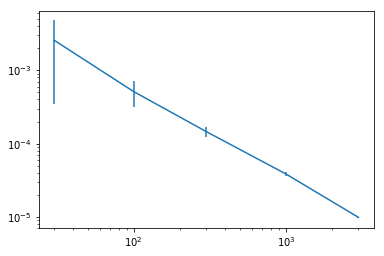

In [270]:
fig, ax = plt.subplots();

ax.set_yscale('log')
ax.set_xscale('log')
ax.errorbar(_x[0:-1], _y[0:-1], yerr=2/np.power(_x[0:-1],2))
plt.show()

In [271]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [272]:
popt, np.sqrt(pcov), np.power(popt[0], 1/2)

(array([ 1.21941538,  0.17069239]), array([[ 0.01955785,  0.02275246],
        [ 0.02275246,  0.02648957]]), 1.1042714227052246)

In [215]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

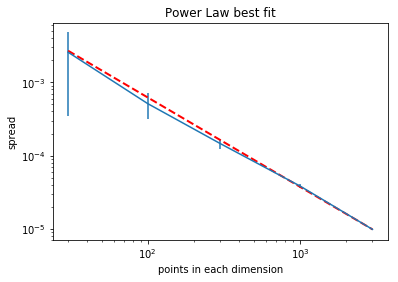

In [216]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('points in each dimension')
#plt.ylabel('some numbers')
plt.show()

# Three-dimensional

In [11]:
def f3d(x,y,z):
    return np.cos(z/(1/np.pi+y))*np.sin(y)*np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

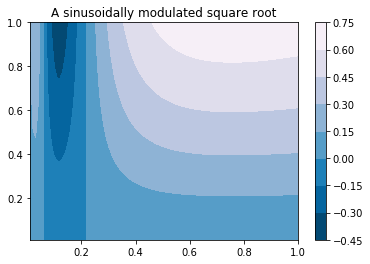

In [5]:
x = np.linspace(0.01,1,100); 
y = np.linspace(0.01,1,100);
z=0.3
X, Y = np.meshgrid(x, y)
t = f3d(X,Y,z);
fig, ax = plt.subplots()
cs=ax.contourf(X, Y, t,cmap=cm.PuBu_r)#, color="red", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
cbar = fig.colorbar(cs)
plt.show()

In [6]:
np.size(Y)

10000

In [12]:
def quadIntegral3d(nP):
    _Xvalues=np.linspace(0.01,1,nP);
    _Yvalues=np.linspace(0.01,1,nP);
    _Zvalues=np.linspace(0.01,1,nP);
    _X, _Y , _Z = np.meshgrid(_Xvalues, _Yvalues, _Zvalues)
    _t = f3d(_X,_Y, _Z);
    return np.sum(_t)/np.size(_t)
    #_sampled_values=np.array([ [ f2d(numX,numY) for numX in _Xvalues ] for numY in _Yvalues ]); #cycles ---> slow!
    #return np.sum(_sampled_values)/np.size(_sampled_values)


In [78]:
quadIntegral3d(10)

0.18905175771414268

In [8]:
quadIntegral3d(100)

0.19508753182867733

In [252]:
_x = [ 30, 60, 100, 200, 300, 500 ]#, 3000, 10000 ]
QuadIntegrals=np.array([ quadIntegral3d(k) for k in _x ])

300 in each dimension makes already 10^9 points >> 3 Gb RAM occupation

<img src="Screenshot 2018-04-03 18.29.43.png">

In [253]:
_y = np.abs(QuadIntegrals - QuadIntegrals[-1])

#_dy = QuadIntegrals[:,1]

In [254]:
_y, _y[0:-1]

(array([  1.83087017e-03,   6.45038928e-04,   3.09058167e-04,
          1.04316953e-04,   4.46756631e-05,   0.00000000e+00]),
 array([  1.83087017e-03,   6.45038928e-04,   3.09058167e-04,
          1.04316953e-04,   4.46756631e-05]))

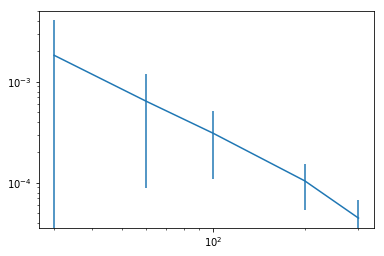

In [255]:
fig, ax = plt.subplots();

ax.set_yscale('log')
ax.set_xscale('log')
ax.errorbar(_x[0:-1], _y[0:-1], yerr=2/np.power(_x[0:-1],2))
plt.show()

In [256]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [261]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([ 1.81789531,  1.43920191]), array([[ 0.10753637,  0.30576046],
        [ 0.30576046,  0.87022461]]), 1.2204583307525054)

In [258]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

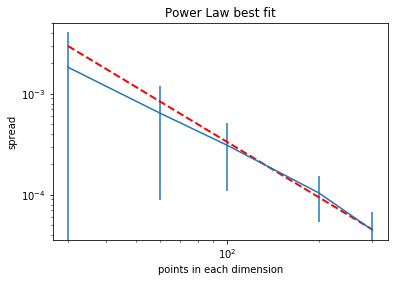

In [259]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('points in each dimension')
#plt.ylabel('some numbers')
plt.show()

In [167]:
np.log10(500**3)

8.0969100130080562

## MC integral

In [91]:
nP=10
dims=3
_values=np.random.rand(nP,dims)

In [92]:
_values

array([[ 0.70727391,  0.94725599,  0.83737524],
       [ 0.46961153,  0.42180388,  0.91557261],
       [ 0.61098503,  0.03162938,  0.57890538],
       [ 0.02973885,  0.29299129,  0.76181366],
       [ 0.94477366,  0.16278744,  0.75739357],
       [ 0.46566267,  0.31710147,  0.55367155],
       [ 0.83849825,  0.50284688,  0.50498788],
       [ 0.79900311,  0.04279819,  0.88308408],
       [ 0.11384978,  0.27748889,  0.4688087 ],
       [ 0.65914087,  0.8734125 ,  0.52340698]])

In [103]:
def mcIntegralFast3d(nP,dims=3):
    _arr_values = np.random.rand(dims,nP);
    _t = f3d(*_arr_values);
    return np.sum(_t)/np.size(_t)


In [106]:
mcIntegralFast3d(1000)

0.1916232590311131

In [133]:
def averageMCintegral(nP,trials=100):
    _arr=np.array([ mcIntegralFast3d(nP) for k in range(trials) ])
    return np.sum(_arr )/trials, np.sqrt(np.var(_arr))  #returns the mean and the std-deviation

In [134]:
averageMCintegral(1000)

(0.19279068775247424, 0.0075603179332883056)

In [135]:
averageMCintegral(3000)

(0.1925422430648206, 0.0041659518990594582)

In [155]:
_x = np.power(np.array([  10, 30, 50, 100, 150, 200 ]),3)
#_x = [10,30,50,100,300,1000]
mcIntegrals=np.array([ averageMCintegral(k) for k in _x ])

In [156]:
_y = np.abs(mcIntegrals[:,0] - mcIntegrals[:,0][-1])

_dy = mcIntegrals[:,1]

In [157]:
_y, _y[0:-1]

(array([  2.24493187e-04,   1.29122510e-04,   5.10176471e-05,
          2.93909196e-05,   1.16900268e-05,   0.00000000e+00]),
 array([  2.24493187e-04,   1.29122510e-04,   5.10176471e-05,
          2.93909196e-05,   1.16900268e-05]))

In [158]:
_dy, _dy[0:-1]

(array([  7.84551212e-03,   1.51048228e-03,   6.15979980e-04,
          2.66765275e-04,   1.35761264e-04,   7.50324080e-05]),
 array([ 0.00784551,  0.00151048,  0.00061598,  0.00026677,  0.00013576]))

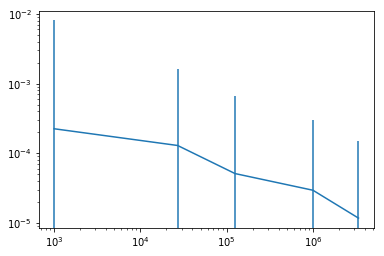

In [159]:
fig, ax = plt.subplots();

ax.set_yscale('log');
ax.set_xscale('log');
ax.errorbar(_x[0:-1], _y[0:-1], yerr=_dy[0:-1])
plt.show()

In [160]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [161]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([ 0.44488734,  0.00963515]), array([[ 0.06481743,  0.02440255],
        [ 0.02440255,  0.00921196]]), 0.76339623879727869)

In [162]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

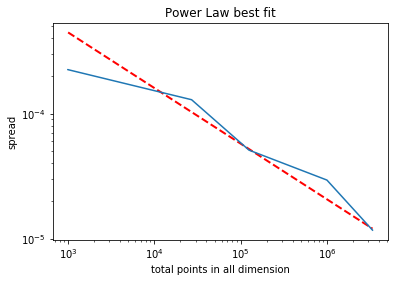

In [163]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

In [169]:
np.log10(150**3)

6.528273777167044

# largeN-dimensional

In [144]:
np.product( [1,2,5] )

10

In [153]:
def fNd(*argv):
    x=argv[0]
    y=argv[1]
    z=argv[2]
    fED=0
    if len(argv)>3:
        rED = np.array([ np.sqrt(argv[M+3]) for M in range(len(argv)-3) ])
        fED=np.product(rED)
    
    return (1-fED)\
*np.cos(z/(1/np.pi+y))*np.sin(y)*np.sqrt(x + 1.0/np.power(np.pi,2.0))*np.sin(1.0/(x + 1.0/np.power(np.pi,2.0)))

In [154]:
fNd(1,1,1,0.3,0.5,0.6)

0.35368001602477206

In [148]:
fNd(1,1,1)

0.50525716574967439

In [149]:
f3d(1,1,1)

0.50525716574967439

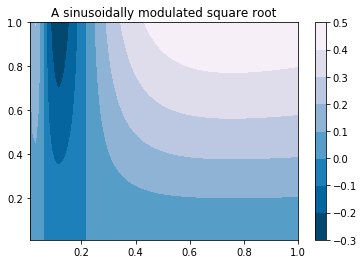

In [163]:
x = np.linspace(0.01,1,100); 
y = np.linspace(0.01,1,100);
z=0.3
u=0.9
v=0.1
X, Y = np.meshgrid(x, y)
t = fNd(X,Y,z,u,v);
fig, ax = plt.subplots()
cs=ax.contourf(X, Y, t,cmap=cm.PuBu_r)#, color="red", linewidth=2.0, linestyle="--")
plt.title("A sinusoidally modulated square root")
#plt.ylabel('some numbers')
cbar = fig.colorbar(cs)
plt.show()

In [62]:
np.size(Y)

10000

In [164]:
def quadIntegralNd(nP,ndims=3):
    nPoints=nP**ndims;
    if nPoints > 10**7-1: print("more than 0.01 bilion points, may kill kernel")
        
    values=np.array( [  np.linspace(0.01,1,nP) for k in range(ndims) ]);
    _A = np.meshgrid( *values  )
    _t = fNd(*_A); 
    
    return np.sum(_t)/np.size(_t)
    

In [166]:
quadIntegral3d(30)

0.19356571982833901

In [167]:
quadIntegralNd(30,ndims=5)

more than 0.01 bilion points, may kill kernel


0.19356571982833939

In [168]:
_x = [ 10, 15, 20, 25, 30, 35, 40 ]#, 3000, 10000 ]
QuadIntegrals=np.array([ quadIntegralNd(k,ndims=5) for k in _x ])

more than 0.01 bilion points, may kill kernel
more than 0.01 bilion points, may kill kernel
more than 0.01 bilion points, may kill kernel


In [169]:
_y = np.abs(QuadIntegrals - QuadIntegrals[-1])

#_dy = QuadIntegrals[:,1]

In [170]:
_y, _y[0:-1]

(array([ 0.00517063,  0.00395631,  0.00228355,  0.00126774,  0.00065667,
         0.00026587,  0.        ]),
 array([ 0.00517063,  0.00395631,  0.00228355,  0.00126774,  0.00065667,
         0.00026587]))

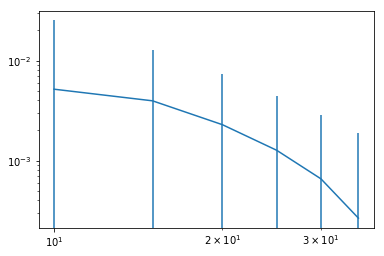

In [171]:
fig, ax = plt.subplots();

ax.set_yscale('log')
ax.set_xscale('log')
ax.errorbar(_x[0:-1], _y[0:-1], yerr=2/np.power(_x[0:-1],2))
plt.show()

In [172]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [173]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([  3.03603949,  13.47026099]), array([[  0.51829035,   3.56882555],
        [  3.56882555,  24.599383  ]]), 1.4480019239708071)

In [174]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

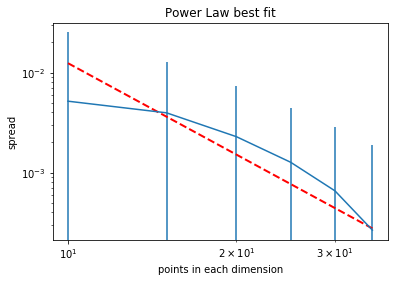

In [175]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('points in each dimension')
#plt.ylabel('some numbers')
plt.show()

In [176]:
np.log10(40**5)

8.0102999566398125

## MC integral

In [177]:
def mcIntegralFastNd(nP,dims=3):
    _arr_values = np.random.rand(dims,nP);
    _t = fNd(*_arr_values);
    return np.sum(_t)/np.size(_t)


In [178]:
mcIntegralFastNd(1000,dims=3)

0.18903388201519652

In [179]:
mcIntegralFastNd(10000,dims=7)

0.19169683820856986

In [180]:
def averageMCintegralNd(nP,trials=100,dims=3):
    _arr=np.array([ mcIntegralFastNd(nP,dims=dims) for k in range(trials) ])
    return np.sum(_arr )/trials, np.sqrt(np.var(_arr))  #returns the mean and the std-deviation

In [181]:
averageMCintegralNd(10**6,dims=5)

(0.1921170253916856, 0.00020166789556891015)

In [135]:
averageMCintegral(3000)

(0.1925422430648206, 0.0041659518990594582)

In [185]:
_x = np.power(np.array( [ 10, 15, 20, 25, 30, 35, 40 ] ),5)/100
print(np.log10(_x))
#_x = [10,30,50,100,300,1000]
mcIntegrals=np.array([ averageMCintegralNd(int(k),dims=5) for k in _x ])

[ 3.          3.8804563   4.50514998  4.98970004  5.38560627  5.72034022
  6.01029996]


In [186]:
_y = np.abs(mcIntegrals[:,0] - mcIntegrals[:,0][-1])

_dy = mcIntegrals[:,1]

In [187]:
_y, _y[0:-1]

(array([  1.27833217e-03,   2.26638914e-04,   3.73922885e-05,
          2.22462806e-05,   3.53307775e-06,   2.16967520e-05,
          0.00000000e+00]),
 array([  1.27833217e-03,   2.26638914e-04,   3.73922885e-05,
          2.22462806e-05,   3.53307775e-06,   2.16967520e-05]))

In [188]:
_dy, _dy[0:-1]

(array([ 0.00813049,  0.00258263,  0.00132402,  0.00064247,  0.00051312,
         0.0003327 ,  0.00019209]),
 array([ 0.00813049,  0.00258263,  0.00132402,  0.00064247,  0.00051312,
         0.0003327 ]))

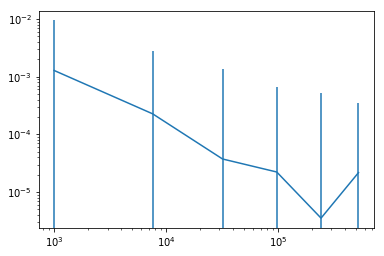

In [189]:
fig, ax = plt.subplots();

ax.set_yscale('log');
ax.set_xscale('log');
ax.errorbar(_x[0:-1], _y[0:-1], yerr=_dy[0:-1])
plt.show()

In [190]:
last=-1
popt, pcov = curve_fit(power_law_fit_model, _x[0:last], _y[0:last],sigma=np.power(_y[0:last],2),p0=[2.9,1.11],bounds=(0,np.inf))


In [191]:
popt, np.sqrt(pcov), np.power(popt[0] ,1/3)

(array([  1.24823867,  18.75576159]), array([[  0.34748859,   5.29265487],
        [  5.29265487,  80.62917775]]), 1.0767111501083235)

In [192]:
_fx=power_law_fit_model(_x,popt[0],popt[1])

In [23]:
np.sqrt(0.347)

0.5890670590009256

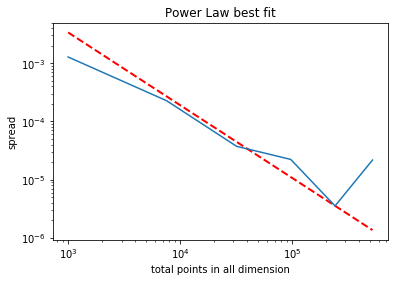

In [193]:
fig, ax = plt.subplots();
ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.errorbar(_x[0:last], _y[0:last], yerr=2/np.power(_x[0:last],2));
ax.set_title("Power Law best fit");
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('spread')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

In [169]:
np.log10(150**3)

6.528273777167044

### Violin Plot

In [194]:
def MCintegralsNd(nP,trials=100,dims=3):
    _arr=np.array([ mcIntegralFastNd(nP,dims=dims) for k in range(trials) ])
    return _arr  #returns all the values

In [211]:
_x = np.power(np.array( [ 10, 15, 20, 25, 30, 35, 40 ] ),5)/100
print(np.log10(_x))
mc_int_results=np.array([ MCintegralsNd(int(k),dims=5) for k in _x ])

[ 3.          3.8804563   4.50514998  4.98970004  5.38560627  5.72034022
  6.01029996]


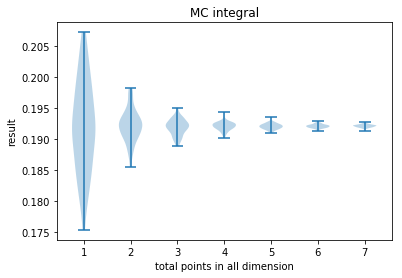

In [214]:
fig, ax = plt.subplots();
#ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.violinplot(mc_int_results.T);
ax.set_title("MC integral");
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('result')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()

In [215]:
y=np.array(mc_int_results)-np.mean(mc_int_results[-1])

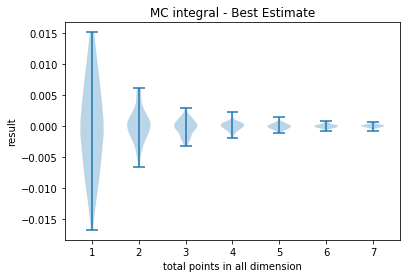

In [217]:
fig, ax = plt.subplots();
#ax.plot(_x[0:last], _fx[0:last], color="red", linewidth=2.0, linestyle="--");
ax.violinplot(y.T);
ax.set_title("MC integral - Best Estimate");
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('result')
ax.set_xlabel('total points in all dimension')
#plt.ylabel('some numbers')
plt.show()